In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_recall_fscore_support

In [64]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [65]:
df_test=pd.read_csv('test.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [70]:
test=pd.read_csv('test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [223]:
train.shape

(891, 12)

In [224]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [225]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"O'Brien, Mr. Timothy",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [226]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [291]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [227]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [228]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [229]:
train.loc[train['Survived']==1,'Survived'].sum()

342

In [230]:
survived=train.loc[train['Survived']==1,:]
survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [231]:
survived.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,342.000000,342.0,342.000000,290.000000,342.000000,342.000000,342.000000
mean,444.368421,1.0,1.950292,28.343690,0.473684,0.464912,48.395408
std,252.358840,0.0,0.863321,14.950952,0.708688,0.771712,66.596998
min,2.000000,1.0,1.000000,0.420000,0.000000,0.000000,0.000000
25%,250.750000,1.0,1.000000,19.000000,0.000000,0.000000,12.475000
50%,439.500000,1.0,2.000000,28.000000,0.000000,0.000000,26.000000
75%,651.500000,1.0,3.000000,36.000000,1.000000,1.000000,57.000000
max,890.000000,1.0,3.000000,80.000000,4.000000,5.000000,512.329200


In [232]:
num_columns=(train.select_dtypes(exclude=['object']))
num_columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [233]:
categorical_columns=(train.select_dtypes(include=['object']))
categorical_columns

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [234]:
female_survived=train.loc[(train['Survived']==1) & (train['Sex']=='female'),'Survived']
female_survived.sum()

233

In [235]:
male_survived=train.loc[(train['Survived']==1) & (train['Sex']=='male'),'Survived']
male_survived.sum()

109

In [236]:
female_unsurvived=train.loc[(train['Survived']==0) & (train['Sex']=='female'),'Survived']
female_unsurvived.value_counts()[0]

81

In [237]:
male_unsurvived=train.loc[(train['Survived']==0) & (train['Sex']=='male'),'Survived']
male_unsurvived.value_counts()[0]

468

In [238]:
train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [239]:
train.pivot_table(index='Survived',columns = 'Sex',values= 'Ticket' , aggfunc= 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [240]:
firstclass_survived = train.loc[(train['Survived']==1) & (train['Pclass']== 1),'Survived']
firstclass_survived.sum()

136

In [241]:
firstclass_unsurvived = train.loc[(train['Survived']==0) & (train['Pclass']== 1),'Survived']
firstclass_unsurvived.value_counts()[0]

80

In [242]:
secondclass_survived = train.loc[(train['Survived']==1) & (train['Pclass']== 2),'Survived']
secondclass_survived.sum()

87

In [243]:
secondclass_unsurvived = train.loc[(train['Survived']==0) & (train['Pclass']== 2),'Survived']
secondclass_unsurvived.value_counts()[0]

97

In [244]:
thirdclass_survived = train.loc[(train['Survived']==1) & (train['Pclass']== 3),'Survived']
thirdclass_survived.sum()

119

In [245]:
thirdclass_unsurvived = train.loc[(train['Survived']==0) & (train['Pclass']== 3),'Survived']
thirdclass_unsurvived.value_counts()[0]

372

In [246]:
first_class =train.loc[train['Pclass']== 1,'Pclass']
first_class.sum()

216

In [247]:
second_class =train.loc[(train['Pclass']== 2)]
second_class.shape[0]

184

In [248]:
third_class =train.loc[(train['Pclass']== 3)]
third_class.shape[0]

491

In [249]:
train['Pclass'].unique()

array([3, 1, 2])

In [250]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [251]:
train.pivot_table(index='Survived',columns = 'Pclass',values= 'Ticket' , aggfunc= 'count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [252]:
S_embarked_survived = train.loc[(train['Survived']==1) & (train['Embarked']== 'S'),'Survived']
S_embarked_survived.sum()

217

In [253]:
S_embarked_unsurvived = train.loc[(train['Survived']==0) & (train['Embarked']== 'S'),'Survived']
S_embarked_unsurvived.value_counts()[0]

427

In [254]:
C_embarked_survived = train.loc[(train['Survived']==1) & (train['Embarked']== 'C'),'Survived']
C_embarked_survived.sum()

93

In [255]:
C_embarked_unsurvived = train.loc[(train['Survived']==0) & (train['Embarked']== 'C'),'Survived']
C_embarked_unsurvived.value_counts()[0]

75

In [256]:
Q_embarked_survived = train.loc[(train['Survived']==1) & (train['Embarked']== 'Q'),'Survived']
Q_embarked_survived.sum()

30

In [257]:
Q_embarked_unsurvived = train.loc[(train['Survived']==0) & (train['Embarked']== 'Q'),'Survived']
Q_embarked_unsurvived.value_counts()[0]

47

In [258]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [259]:
train.pivot_table(index='Survived',columns = 'Embarked',values= 'Ticket' , aggfunc= 'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


# Plot

Text(0, 0.5, 'Freq')

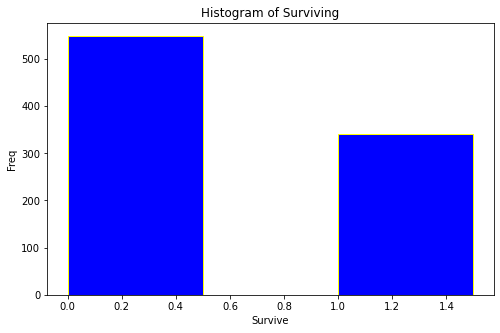

In [260]:
plt.figure(figsize=(8,5))
plt.hist(train['Survived'],color='blue',edgecolor='yellow',bins=np.arange(0,2,0.5))
plt.title('Histogram of Surviving')
plt.xlabel('Survive')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

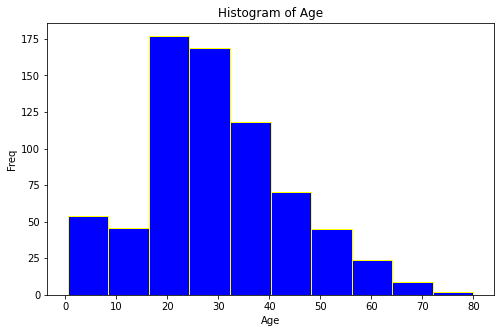

In [261]:
plt.figure(figsize=(8,5))
plt.hist(train['Age'],color='blue',edgecolor='yellow')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

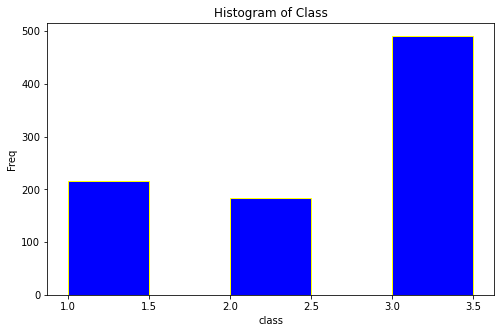

In [262]:
plt.figure(figsize=(8,5))
plt.hist(train['Pclass'],color='blue',edgecolor='yellow',bins=np.arange(1,4,0.5))
plt.title('Histogram of Class')
plt.xlabel('class')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

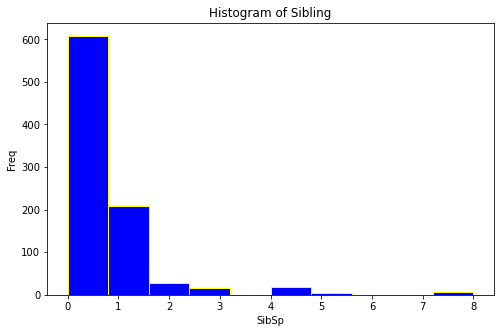

In [263]:
plt.figure(figsize=(8,5))
plt.hist(train['SibSp'],color='blue',edgecolor='yellow')
plt.title('Histogram of Sibling')
plt.xlabel('SibSp')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

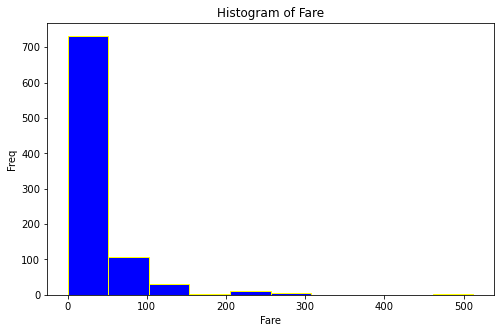

In [264]:
plt.figure(figsize=(8,5))
plt.hist(train['Fare'],color='blue',edgecolor='yellow')
plt.title('Histogram of Fare')
plt.xlabel('Fare')
plt.ylabel('Freq')

Text(0, 0.5, 'Freq')

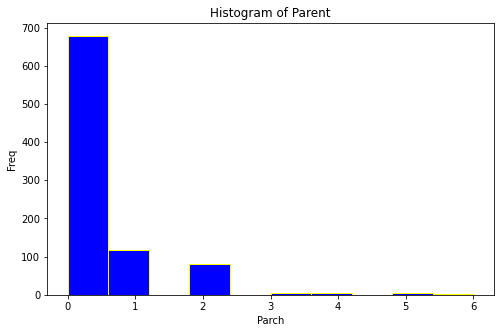

In [265]:
plt.figure(figsize=(8,5))
plt.hist(train['Parch'],color='blue',edgecolor='yellow')
plt.title('Histogram of Parent')
plt.xlabel('Parch')
plt.ylabel('Freq')

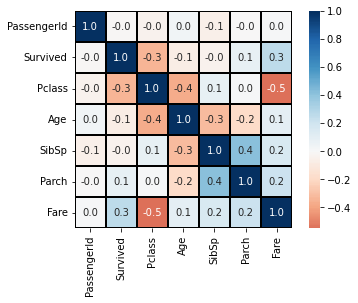

In [266]:
correlation=train.corr()
sns.heatmap(correlation,cmap='RdBu',linewidth=1,center=0,linecolor='black',square=True,annot=True,fmt='0.1f')

Text(0.5, 1.0, 'bar plot Sex vs. Freq')

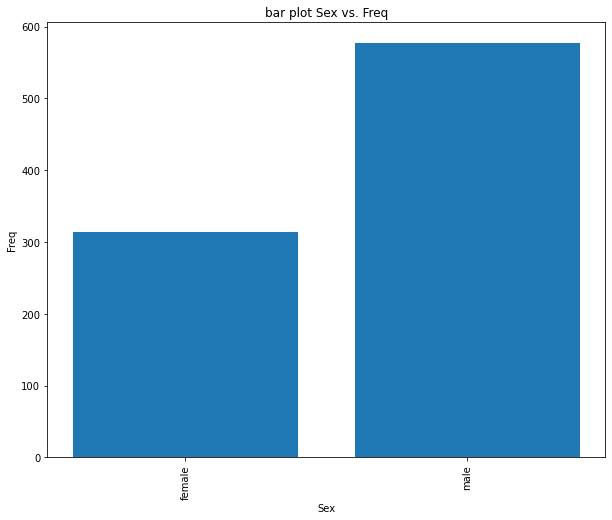

In [267]:
y=[]
x= np.unique(train['Sex'])
for i in x:
    y.append((train['Sex']==i).sum())

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.xticks(x,rotation=90)
plt.xlabel('Sex')
plt.ylabel('Freq')
plt.title('bar plot Sex vs. Freq')

Text(0.5, 1.0, 'bar plot Survived vs. Freq')

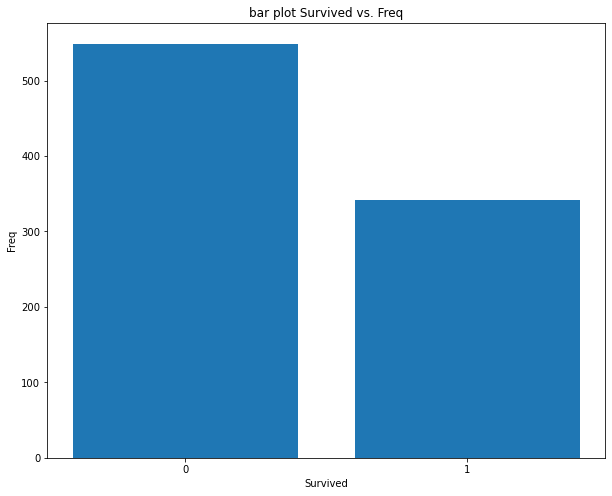

In [268]:
y=[]
x= np.unique(train['Survived'])
for i in x:
    y.append((train['Survived']==i).sum())

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Survived')
plt.ylabel('Freq')
plt.title('bar plot Survived vs. Freq')

Text(0.5, 1.0, 'bar plot Ticket vs. Freq')

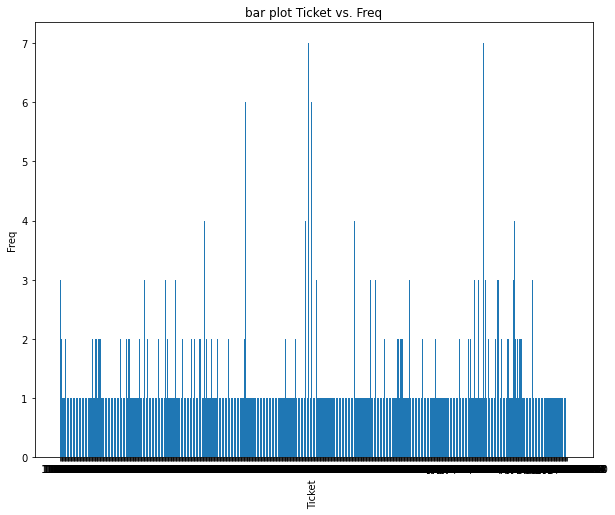

In [49]:
y=[]
x= np.unique(train['Ticket'])
for i in x:
    y.append((train['Ticket']==i).sum())

plt.figure(figsize=(10,8))
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Ticket',rotation=90)
plt.ylabel('Freq')
plt.title('bar plot Ticket vs. Freq')

Text(0.5, 1.0, 'bar plot Cabin vs. Freq')

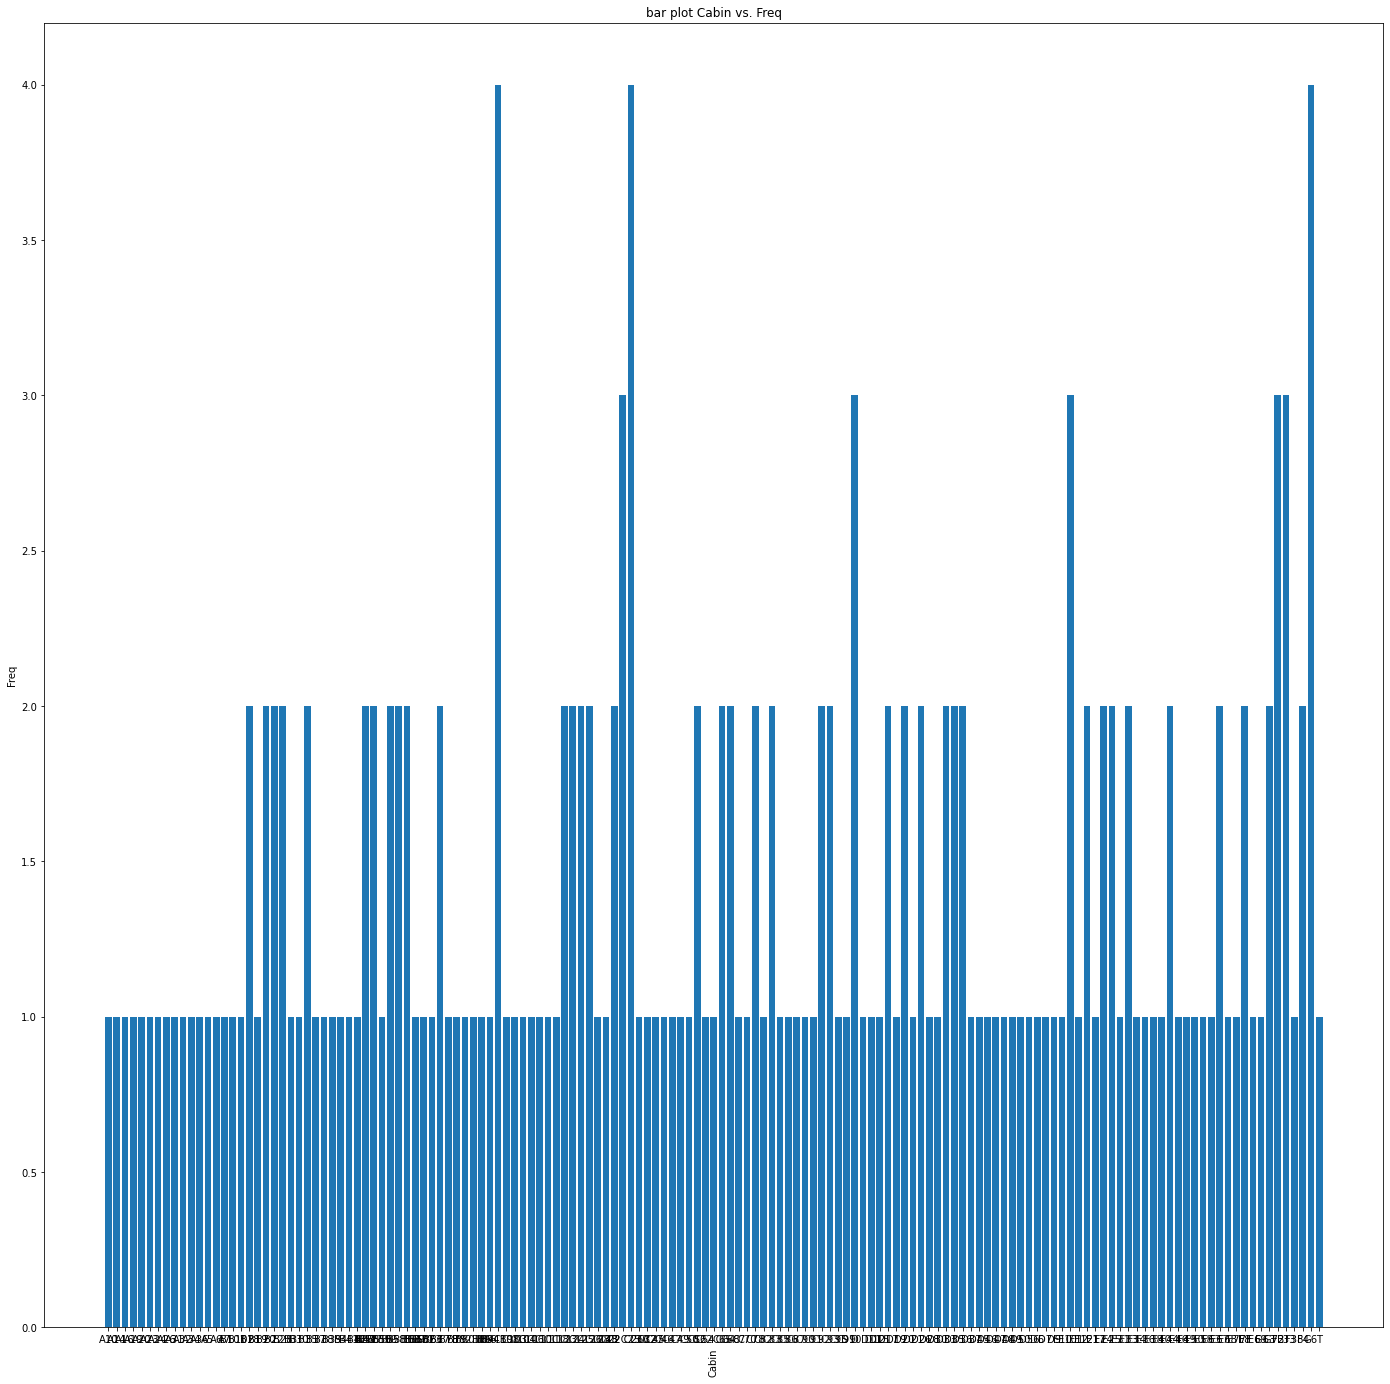

In [269]:
train['Cabin'].dropna(axis=0,inplace=True)
y=[]
x= np.unique(train['Cabin'])
for i in x:
    y.append((train['Cabin']==i).sum())

plt.figure(figsize=(24,24))
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Cabin',rotation=90)
plt.ylabel('Freq')
plt.title('bar plot Cabin vs. Freq')

Text(0.5, 1.0, 'bar plot Embark vs. Freq')

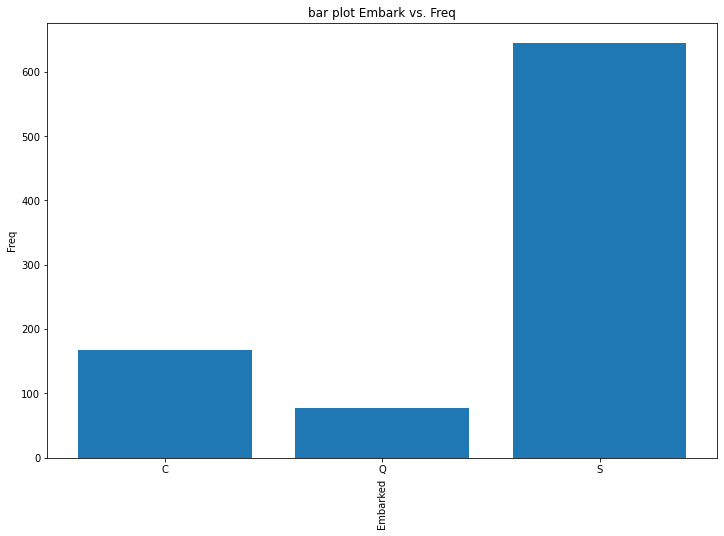

In [270]:
train['Embarked'].dropna(axis=0,inplace=True)

y=[]
x= np.unique(train['Embarked'])
for i in x:
    y.append((train['Embarked']==i).sum())

plt.figure(figsize=(12,8))
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Embarked',rotation=90)
plt.ylabel('Freq')
plt.title('bar plot Embark vs. Freq')

Text(0.5, 1.0, 'bar plot Age vs. Freq')

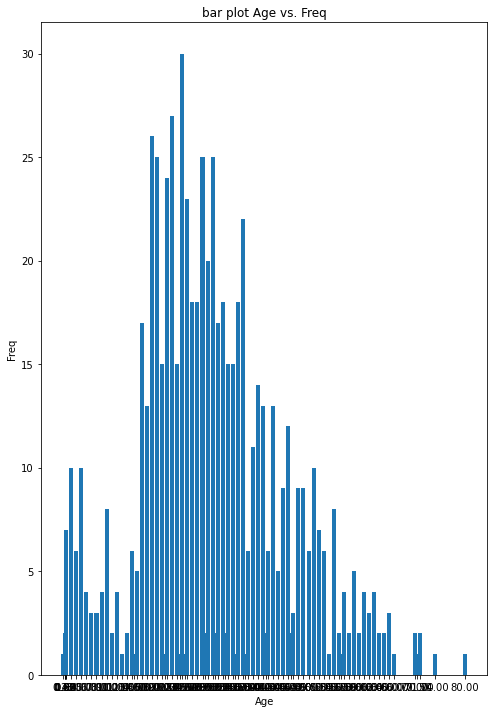

In [271]:
train['Age'].dropna(axis=0,inplace=True)
y=[]
x= np.unique(train['Age'])
for i in x:
    y.append((train['Age']==i).sum())

plt.figure(figsize=(8,12))
plt.bar(x,y)
plt.xticks(x)
plt.xlabel('Age')
plt.ylabel('Freq')
plt.title('bar plot Age vs. Freq')

In [272]:
train.pivot_table(index='Survived',values=['Pclass','Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,Pclass,SibSp
Survived,,,,,
0,30.626179,22.117887,0.329690,2.531876,0.553734
1,28.343690,48.395408,0.464912,1.950292,0.473684


In [273]:
train.pivot_table(index='Survived',columns = 'Pclass',values= 'Ticket' , aggfunc= 'count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [274]:
train.pivot_table(index='Survived',columns = 'Sex',values= 'Ticket' , aggfunc= 'count')

Sex,female,male
Survived,,
0,81,468
1,233,109


In [275]:
train.pivot_table(index='Survived',columns = 'Embarked',values= 'Ticket' , aggfunc= 'count')

Embarked,C,Q,S
Survived,,,
0,75,47,427
1,93,30,217


# Feature Eng.

In [276]:
train=pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Cabin

In [209]:
missed_Cabin = np.sum(train["Cabin"].isna())
missed_Cabin

687

In [210]:
train["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [211]:
len(train["Cabin"].unique())

148

In [212]:
train['Cabin_adv']= train.Cabin.agg (lambda x : str(x)[0])

In [213]:
train['Cabin_adv'].unique()

array(['n', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [214]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_adv
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1.0,0,A/5 21171,7.2500,NaN,S,n
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0,PC 17599,71.2833,C85,C,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0.0,0,STON/O2. 3101282,7.9250,NaN,S,n
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0,113803,53.1000,C123,S,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0.0,0,373450,8.0500,NaN,S,n


In [64]:
train.pivot_table(index='Survived',columns = 'Cabin_adv',values= 'Ticket' , aggfunc= 'count')

Cabin_adv,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


# Ticket

In [308]:
train['num_ticket'] = train . Ticket . agg (lambda x: 1 if x.isnumeric() else 0)

In [309]:
train['num_ticket']. value_counts()

1    661
0    230
Name: num_ticket, dtype: int64

In [310]:
train.pivot_table(index='Survived',columns = 'num_ticket',values= 'Ticket' , aggfunc= 'count')

num_ticket,0,1
Survived,,
0,142,407
1,88,254


In [311]:
train['letter_ticket'] = train . Ticket . agg (lambda x: ''.join(x.split(' ')[:-1]) . replace ('.','') . 
                                               replace ('/','').lower() if len(x.split(' ')[:-1])> 0 else 0) 

In [312]:
train['letter_ticket'].unique()

array(['a5', 'pc', 'stono2', 0, 'pp', 'ca', 'scparis', 'sca4', 'a4', 'sp',
       'soc', 'wc', 'sotonoq', 'wep', 'c', 'sop', 'fa', 'fcc', 'swpp',
       'scow', 'ppp', 'sc', 'scah', 'as', 'scahbasle', 'sopp', 'fc',
       'sotono2', 'casoton'], dtype=object)

In [282]:
train['letter_ticket'].value_counts()

0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
pp             3
sopp           3
wep            3
swpp           2
ppp            2
sotono2        2
scah           2
scow           1
sop            1
fa             1
as             1
fc             1
casoton        1
sca4           1
scahbasle      1
sc             1
sp             1
Name: letter_ticket, dtype: int64

In [283]:
train.pivot_table(index='Survived',columns = 'letter_ticket',values= 'Ticket' , aggfunc= 'count')

letter_ticket,0,a4,a5,as,c,ca,casoton,fa,fc,fcc,...,soc,sop,sopp,sotono2,sotonoq,sp,stono2,swpp,wc,wep
Survived,,,,,,,,,,,,,,,,,,,,,
0,410.0,7.0,19.0,1.0,3.0,27.0,1.0,1.0,1.0,1.0,...,5.0,1.0,3.0,2.0,13.0,1.0,10.0,NaN,9.0,2.0
1,255.0,NaN,2.0,NaN,2.0,14.0,NaN,NaN,NaN,4.0,...,1.0,NaN,NaN,NaN,2.0,NaN,8.0,2.0,1.0,1.0


# name

In [68]:
train['name_title']= train . Name . agg (lambda x : x.split (',')[1] . split ('.')[0] . strip())


In [71]:
test['name_title']= test . Name . agg (lambda x : x.split (',')[1] . split ('.')[0] . strip())

In [5]:
train['name_title'].value_counts()
test['name_title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Rev         2
Col         2
Dr          1
Dona        1
Ms          1
Name: name_title, dtype: int64

In [6]:
train.pivot_table(index='Survived',columns = 'name_title',values= 'Ticket' , aggfunc= 'count')

name_title,Capt,Col,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir,the Countess
Survived,,,,,,,,,,,,,,,,,
0,1.0,1.0,1.0,4.0,1.0,NaN,1.0,17.0,55.0,NaN,NaN,436.0,26.0,NaN,6.0,NaN,NaN
1,NaN,1.0,NaN,3.0,NaN,1.0,1.0,23.0,127.0,2.0,1.0,81.0,99.0,1.0,NaN,1.0,1.0


In [72]:
train ['family'] = train ['SibSp'] + train ['Parch']


In [73]:
test ['family'] = test ['SibSp'] + test ['Parch']


# Missing Value

In [8]:
train.isna().sum()
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
name_title       0
family           0
dtype: int64

In [74]:
train['Embarked'].mode()[0]

'S'

In [76]:
train['Embarked']=train['Embarked'].fillna(train['Embarked'].mode()[0])



In [77]:
test["Fare"] = test["Fare"].fillna(test["Fare"].mean())

In [78]:
x=train[['SibSp','Fare','Age']]
Impute_it = IterativeImputer()
x=Impute_it.fit_transform(x)
train[['SibSp','Fare','Age']]=x

In [79]:
z=test[['SibSp','Fare','Age']]
Impute_it = IterativeImputer()
z=Impute_it.fit_transform(z)
test[['SibSp','Fare','Age']]=z

In [80]:
train.drop("Cabin",axis=1,inplace=True)
test.drop("Cabin",axis=1,inplace=True)
train.drop("Parch",axis=1,inplace=True)
test.drop("Parch",axis=1,inplace=True)
train.drop("SibSp",axis=1,inplace=True)
test.drop("SibSp",axis=1,inplace=True) 
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)
train.drop("Ticket",axis=1,inplace=True)
test.drop("Ticket",axis=1,inplace=True)
train.drop("PassengerId",axis=1,inplace=True)
test.drop("PassengerId",axis=1,inplace=True)
train.drop("Embarked",axis=1,inplace=True)
test.drop("Embarked",axis=1,inplace=True)
train.drop("name_title",axis=1,inplace=True)
test.drop("name_title",axis=1,inplace=True)

In [14]:
train.head()
test.head()

,Pclass,Sex,Age,Fare,family
0,3,male,34.5,7.8292,0
1,3,female,47.0,7.0000,1
2,2,male,62.0,9.6875,0
3,3,male,27.0,8.6625,0
4,3,female,22.0,12.2875,2


In [15]:
train.isna().sum()
test.isna().sum()

Pclass    0
Sex       0
Age       0
Fare      0
family    0
dtype: int64

# Outlier

In [ ]:
Q1 = df ['Fare'] . quantile (0.25)
Q3 = df ['Fare'] . quantile (0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [ ]:
outlier = df[(df ['Fare'] < lower_limit) | (df ['Fare'] > upper_limit)]
outlier

# Categorical Variable to Numerical

In [81]:
train=pd.get_dummies(train)
train.head()

,Survived,Pclass,Age,Fare,family,Sex_female,Sex_male
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,1,1,0
2,1,3,26.0,7.9250,0,1,0
3,1,1,35.0,53.1000,1,1,0
4,0,3,35.0,8.0500,0,0,1


In [82]:
test=pd.get_dummies(test)
test.head()

,Pclass,Age,Fare,family,Sex_female,Sex_male
0,3,34.5,7.8292,0,0,1
1,3,47.0,7.0000,1,1,0
2,2,62.0,9.6875,0,0,1
3,3,27.0,8.6625,0,0,1
4,3,22.0,12.2875,2,1,0


In [ ]:
#feature selection
correlation = train.corr()
correlation_based = (correlation.loc['Pclass':'name_title_the Countess', "Survived"])
score["Correlation_based"] = correlation_based

# Scaling

In [83]:
X_train=train.iloc[:,1:]
X_train=scale(X_train)
X_train=pd.DataFrame(X_train,columns=train.columns[1:])
X_train.head()

,Pclass,Age,Fare,family,Sex_female,Sex_male
0,0.827377,-0.561279,-0.502445,0.059160,-0.737695,0.737695
1,-1.566107,0.628000,0.786845,0.059160,1.355574,-1.355574
2,0.827377,-0.263959,-0.488854,-0.560975,1.355574,-1.355574
3,-1.566107,0.405010,0.420730,0.059160,1.355574,-1.355574
4,0.827377,0.405010,-0.486337,-0.560975,-0.737695,0.737695


In [84]:
y_train=train['Survived']

In [85]:
X_test=test.iloc[:,:]
X_test=scale(X_test)
X_test=pd.DataFrame(X_test,columns=test.columns[:])
X_test.head()

,Pclass,Age,Fare,family,Sex_female,Sex_male
0,0.873482,0.363803,-0.498407,-0.553443,-0.755929,0.755929
1,0.873482,1.351382,-0.513274,0.105643,1.322876,-1.322876
2,-0.315819,2.536477,-0.465088,-0.553443,-0.755929,0.755929
3,0.873482,-0.228745,-0.483466,-0.553443,-0.755929,0.755929
4,0.873482,-0.623776,-0.418471,0.764728,1.322876,-1.322876


# VIF

In [ ]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif['features']=x.columns
    vif['VIF']=[variance_inflation_factor(x.values,i)for i in range (x.shape[1])]
    
    return (vif)
calc_vif(X_train)

# PCA

In [70]:
pca=PCA(0.90)
pca.fit(X_train)

PCA(n_components=0.9)

In [71]:
pca=PCA(0.90)
pca.fit(X_test)

PCA(n_components=0.9)

In [73]:

y_train=train['Survived']



# Model

In [54]:
dectree = DecisionTreeClassifier()
hyperparameters = {"max_depth": np.arange(10, 30, 1),
                   "criterion": ["gini", "entropy"],
                   "max_features": np.arange(1, 6)}

cv_grid_dectree = GridSearchCV(dectree, param_grid = hyperparameters,
                       scoring = "accuracy", cv = 10)
cv_grid_dectree = cv_grid_dectree.fit(X_train, y_train)

In [56]:
final_model_dectree = cv_grid_dectree . best_estimator_
final_model_dectree .fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11, max_features=4)

In [57]:
y_pred_train = final_model_RForest.predict(X_train)


In [58]:
np.sum(y_pred_train ) / y_train.shape[0]

0.35129068462401797

In [59]:
confusion_matrix(y_train, y_pred_train)

array([[533,  16],
       [ 45, 297]])

In [60]:
y_pred_dectree = final_model_dectree . predict (X_test)

In [62]:
output1 = pd.DataFrame({'PassengerId':df_test.PassengerId,'Survived': y_pred_dectree})
output1.to_csv('submission1.csv', index=False)

In [103]:
#Feature Selection
score = final_model_dectree.feature_importances_
score = pd.DataFrame(score, index = X_train.columns, columns = ["DecisionTree"])
score.head()

,DecisionTree
Pclass,0.110933
Age,0.192860
Fare,0.193121
family,0.087620
Sex_female,0.135986


# Random Forest

In [24]:
model=RandomForestClassifier()
hyperparameters = {'n_estimators': np.arange(10, 200,1) ,"max_depth": np.arange(10, 100, 10),
                   "criterion": ["gini", "entropy"],
                   "max_features": np.arange(1, 6)}

cv_grid_RandomForest = GridSearchCV(model, param_grid = hyperparameters,
                       scoring = "accuracy", cv = 10)
cv_grid_RandomForest = cv_grid_RandomForest.fit(X_train, y_train)

In [25]:
final_model_RForest = cv_grid_RandomForest . best_estimator_
final_model_RForest .fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, max_features=2,
                       n_estimators=39)

In [26]:
y_pred_train = final_model_RForest.predict(X_train)


In [27]:
np.sum(y_pred_train ) / y_train.shape[0]

0.35129068462401797

In [28]:
confusion_matrix(y_train, y_pred_train)

array([[533,  16],
       [ 45, 297]])

In [46]:
y_pred_RForest =  final_model_RForest . predict (X_test)
y_pred_RForest

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [53]:
output2 = pd.DataFrame({'PassengerId': df_test['PassengerId'],'Survived': y_pred_RForest})
output2.to_csv('submission2.csv', index=False)

# Logistic Regression

In [86]:
lr = LogisticRegression()
lda = LinearDiscriminantAnalysis()
qda = QuadraticDiscriminantAnalysis()
gnb = GaussianNB()

hyperparameters = {"penalty": ['l2','l1','elasticnet'],
                   "solver": ['newton-cg','lbfgs', 'liblinear', 'sag', 'saga' ,'svd', 'lsqr', 'eigen']}

cv_grid = GridSearchCV(estimator = [lr,lda,qda,gnb] , param_grid = hyperparameters,
                       scoring = "accuracy", cv = 10)
cv_grid = cv_grid.fit(X_train, y_train)

TypeError: estimator should be an estimator implementing 'fit' method, [LogisticRegression(), LinearDiscriminantAnalysis(), QuadraticDiscriminantAnalysis(), GaussianNB()] was passed

In [ ]:
cv_grid.best_params_

In [ ]:
final_model = cv_grid.best_estimator_
final_model.fit(X_train, y_train)

In [ ]:
confusion_matrix(y_train, y_pred_train

In [ ]:
y_pred =  final_model. predict (X_test)
y_pred

In [ ]:
y_pred.to_csv('y_pred')

In [ ]:
output3 = pd.DataFrame({'PassengerId': test.PassengerId,'Survived': y_pred})
output3.to_csv('submission.csv', index=False)

In [ ]:
class_models = []
class_models.append(('LogisticRegression', LogisticRegression()))
class_models.append(('KNearestNeighbours', KNeighborsClassifier(n_neighbors= 3)))
class_models.append(('GaussianNB', GaussianNB()))
class_models.append(('DecisionTrees', DecisionTreeClassifier()))
class_models.append(('RandomForest', RandomForestClassifier()))
class_models.append(('AdaBoost', AdaBoostClassifier()))
class_models.append(('Bagging Classifier', BaggingClassifier()))
class_models.append(('GradientBoosting', GradientBoostingClassifier()))
#class_models.append(('XGB', XGBClassifier(verbosity=0)))
class_models.append(('SVC', SVC(kernel = 'rbf',probability=True)))
